# Git

 > Disclaimer: This post has been translated to English using a machine translation model. Please, let me know if you find any mistakes.

## Introduction

Git is a version control software created by Linus Torvalds, who developed it to have good version control while developing the Linux kernel.

## The areas of git

Git has three areas, although a fourth can also be considered.
![git states](https://images.maximofn.com/git-states.webp)
* The first one is our workspace, where we have all our code. Here, when we modify or create a file, it becomes untracked, so we have to move it to the `staged` area.* The second area is the `staged`. Here, the files that we had modified or created and were not *tracked* move to being tracked, meaning Git starts tracking them. We will send the files to the next `head` area from here.* The third area is the `head`. Here we have recorded a version of our code. By recording versions, we can revert to previous versions if necessary. The recorded version of our code can be sent to a server so that it is accessible by multiple people.* The three areas mentioned above correspond to local work, but there is one more area and that is the `remote server`. Here we send the recorded version of our code to a server so that we have access to the code from anywhere, or so that more people can access it.
To make an analogy, it's like a scenario where you are going to take a photo. First, you have your modified files, so the ones you want to immortalize you send to the `staged` area, which is the stage. Once you've sent all the files you consider necessary, you take the photo, meaning you send all the files to the `head` area. This way, you can keep taking many photos as the code evolves, so you can have a photo album showing the evolution of the code. Finally, you can upload that photo to a server to make it accessible to more people, which means you send them to the `remote server`.

## Install git

In most Linux distributions, Git is already installed. We can check this by running `git --version`

In [1]:
!git --version

git version 2.25.1


If you don't have it or want to update the version of git, just run `sudo apt update` and then `sudo apt install git`

In [3]:
!sudo apt update && sudo apt install git

[sudo] password for maximo.fernandez@AEROESPACIAL.SENER: 


We check the version again

In [4]:
!git --version

git version 2.25.1


In my case, I already had the latest version

## Initial Setup

### Setting the name and email

Before starting to use Git, it is advisable to make some minimal configurations such as your username and email. This information will be displayed when showing who has made changes to the code. To do this, you need to run

```bash
git config --global user.name "<username>"git config --global user.email "<email>"```

In my case, I would put
```bash
git config --global user.name "MaximoFN"git config --global user.email "maximofn@gmail.com"```

As can be seen, the `--global` flag changes the global git configuration. However, if you need to set different data for a specific repository, simply navigate to that repository and remove the `--global` flag from the previous commands.
```bash
git config user.name "<username>"git config user.email "<email>"```

### Set the default editor

Later on, when we explain what `commit`s are, we will see that one of the options can open a browser. By default, git will try to use `vim`, but since it is not a very easy editor to use, we can modify it. Below is how to do it with some common editors.
```bash
git config --global core.editor "code"  # vscode as editorgit config --global core.editor "atom"  # Atom as editorgit config --global core.editor "subl"  # Sublime Text as editorgit config --global core.editor "nano"  # Nano as the editor```

### Check git configuration

To review the git configuration we can use `git config --list`

In [6]:
!git config --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


We can use the flags `--global`, `--local`, and `--system` to view only the global configuration, local (if it exists), and system (if it exists).

In [8]:
!git config --global --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true


In [9]:
!git config --local --list

core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


In [10]:
!git config --system --list

fatal: unable to read config file '/etc/gitconfig': No such file or directory


In my case there is no system configuration

If you want to know only the value of a configuration parameter, it would be enough to enter `git config <parameter>`

In [15]:
!git config user.name

maximofn


## Local version control

### Initialize a new repository (`git init`)

There are two ways to initialize a new repository:* One is by doing `git init <repository name>`. This will create a new folder with the repository name.* Another is navigating to the folder where we want to create a repository and running `git init`
I am going to create a new repository

In [1]:
!git init notebook_git

Inicializado repositorio Git vacío en /home/wallabot/Documentos/web/portafolio/posts/notebook_git/.git/


If we now run `ls` we will see that a new folder called `notebook_git` has been created.

In [3]:
!ls | grep notebook_git

notebook_git


We move to it

In [4]:
!cd notebook_git

Now inside the folder we have two ways to know that the repository has been created, one by doing `ls -a` which will show all files and we will see that there is a folder called `.git`. The other way is by doing `git status` which will tell us the state of the repository.

In [5]:
!cd notebook_git && ls -a

.  ..  .git


In [6]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

no hay nada para confirmar (crea/copia archivos y usa "git add" para hacerles seguimiento)


Since we are in a notebook, each cell has its `path` within the notebook's `path`, which is why I had to do `cd notebook_git &&` twice, to change to the folder with the repository we just created.

If we now try `git status` in another `path` where a repository has not been initialized, it will give us an error.

In [95]:
!cd ~/ && git status

fatal: no es un repositorio git (ni ninguno de los directorios superiores): .git


### Create new files

Once we have initialized a repository, we can start creating new files, so we create one and see what happens

In [7]:
!cd notebook_git && echo "print('Hello World')" > hello.py

If we now run `git status` again, we see that it shows us

In [8]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hello.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


As you can see now, it's telling us that the file `hello.py` is not being tracked. This means we need to add `hello.py` to the `staged` area, which we remember was like the stage where we put everything that we will later take a photo of.

### Undo the creation of a new file

In this case, since these are files that git is not yet tracking, that is, they are not yet in the `staged` area, we would have three ways to do it

* Simply deleting it: Since git is not yet tracking the file, we could do `rm hello.py` and that's it.* Deleting it using a Git command: We previously deleted with `rm`, but you might be on a system that does not have the `rm` command. In that case, you can use the Git command `git rm hello.py`* Finally, we can use `git clean`. This is useful, for example, when there are many new files, and thus, in a single command, we remove all of them.

#### `git clean`

If we run `git clean` by itself, it will give us an error

In [9]:
!cd notebook_git && git clean

fatal: clean.requireForce default en true y ninguno de -i, -n, ni -f entregado; rehusando el clean


It is telling us that we need to add one of these flags `-n`, `-i` or `-f`. Additionally, we will look at the `-d` flag.
* `-n` (dry run): It will tell us which files are going to be deleted, but it won't delete them.* `-i`: It will ask for each file that is going to be deleted* `-f`: Will force the deletion of files* `-d`: It will also delete folders

Let's test it, first we do `git clean -n` to know which files would be deleted

In [10]:
!cd notebook_git && git clean -n

Será borrado hello.py


Now we do `git clean -f` to delete it, since we agree that it should be deleted.

In [11]:
!cd notebook_git && git clean -f

Borrando hello.py


As we can see, it has deleted `hello.py`

### Add a file to the staging area (`git add`)

We go back to creating a file

In [12]:
!cd notebook_git && echo "print('Hola mundo')" > hola.py

We run `git status` again to check that we have the file

In [13]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hola.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


We see that we have the file `hola.py` but git is not tracking it. Additionally, it helps us and tells us to `use "git add" to track them`
The syntax is as follows `git add <file>`, but we can do it in several ways
* If we want to add more than one file, we can do so by listing all the files we want to add to the staging area, separated by a space: `git add <file1> <file2> <file3>`* If we want to add all files of the same format, for example, if we want to add all Python files it would be `git add *.py`* If we want to add all files from a folder `git add <folder>/`* If we want to add all files, we have three options: `git add --all`, `git add -A` or `git add .`

Let's add the newly created file

In [14]:
!cd notebook_git && git add hola.py

We run a `git status` to see what has happened

In [15]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



As we can see, it tells us that we have a new file being tracked and awaiting confirmation `hola.py`

### Unstage a file (`git reset`)

If we add a file to the staging area and want to remove it, we have to use `git reset <file>`, let's see it.

We create and add a new file to the staging area

In [16]:
!cd notebook_git && echo "print('Este no')" > adios.py && git add adios.py

We run `git status` to check that it is in the staging area

In [17]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: adios.py
	nuevos archivos: hola.py



As we can see, there are `hola.py` and `adios.py`, so we use `git reset adios.py` to remove it from the staging area.

In [18]:
!cd notebook_git && git reset adios.py

We run a `git status` to check that it has come out

In [19]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	adios.py



We can see that `adios.py` is no longer being tracked by git, it has been removed from the staging area.

We do `git clean -f` to delete it

In [20]:
!cd notebook_git && git clean -f && git status

Borrando adios.py
En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



### Commit (`git commit`)

If we go back to the analogy where we said that the staging area was the stage where we sent the files we wanted to take a picture of, now it's time to take the picture to immortalize the current state. This is making a `commit`
This is how the current state of the code is registered; thus, with each commit, a record of the code's evolution will be kept. Similarly to a photo album, with each photo we have a record of the evolution of what we put on stage.

Since Git is registering the code change when making a commit, it doesn't allow us to commit without at least a minimal comment. Therefore, there are two ways to make a commit.
* `git commit` this way the editor we have set in git's configuration will open. If we haven't configured a default editor, `vi` will open. If we want to change the editor configuration, we can do, for example, `git config --global core.editor "code"` or `git config core.editor "code"` to set vscode as the default editor globally or locally.* `git commit -m "Commit message"`. This way we add the message directly
When making the commit in the first way, we can have a first line that will be the commit title and several more lines where it is explained in more detail. If we want to be able to do this with the `-m` flag, it is enough to add several consecutive `-m` flags: `git commit -m "Commit title" -m "First line explaining more" -m "Second line explaining more"`

Once we have made the commit, this will save a record of the change to our repository locally. We haven't connected to a remote server yet.

Let's try to make the commit

In [21]:
!cd notebook_git && git commit -m "Primer commit, hola.py"

[master (commit-raíz) 1c95e4f] Primer commit, hola.py
 1 file changed, 1 insertion(+)
 create mode 100644 hola.py


We do a `git status`

In [22]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


We see that it tells us there is nothing new, we have our entire repository fully under control.

#### Skipping the staging area with `git commit -a -m` or `git commit -am`

In the case where we want to move all modified files to the staging area and then commit them, we can do this in a single step using `git commit -a -m "message"`, `git commit --all -m "message"`, or `git commit -am "message"`
> Note: This is only valid if a file is modified. If the file is new and git is not tracking it, this is not valid.
Let's see an example, we are going to modify `hola.py`

In [23]:
!cd notebook_git && echo "print('He añadido una nueva linea')" >> hola.py

Let's do a `git status` to make sure

In [24]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


We can see that in the git help itself, it suggests using `git commit -a`, so let's do it.

In [25]:
!cd notebook_git && git commit -am "Segundo commit, hola.py"

[master 6e99e73] Segundo commit, hola.py
 1 file changed, 1 insertion(+)


We run `git status` again

In [26]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


There is nothing to commit, the change has already been committed.

### Modify a file that has already been committed

While we are developing, we might modify files that we have already committed. In our case, we are going to add a line to `hola.py`

In [27]:
!cd notebook_git && echo "print('He añadido una tercera linea')" >> hola.py

In [28]:
!cd notebook_git && cat hola.py

print('Hola mundo')
print('He añadido una nueva linea')
print('He añadido una tercera linea')


If we run `git status` we will see that `hola.py` has modifications

In [29]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


### View changes in a file (`git diff <file>`)

We might have been developing for a while since the last commit and not know what modifications we've made. For this, we use `git diff <file>` which will tell us the changes we've made.

In [30]:
!cd notebook_git && git diff hola.py

diff --git a/hola.py b/hola.py
index 91dee80..fba0d22 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1,3 @@
 print('Hola mundo')
 print('He añadido una nueva linea')
+print('He añadido una tercera linea')


Although it's not very intuitive, we can see that we've added the last line in `hola.py`

### Unstage changes in a file (`git restore <file>`)

If we don't like the changes we've made and want to remove them, what we can do is `git restore <file>`

In [31]:
!cd notebook_git && git restore hola.py

Let's see what has happened with a `git status`

In [32]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


We see that the changes in `hola.py` have been discarded since the last commit.

### Change history (`git log`)

With git we can see the history of all the changes we have been committing, for this we use `git log`. It's like if we were to review our photo album.

In [33]:
!cd notebook_git && git log

commit 6e99e73cf0c5474078cc9f328ee6a54fb9ffb169 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:04 2023 +0200

    Segundo commit, hola.py

commit 1c95e4fd8388ceedee368e0121c4b0ef4900c2ac
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:28:44 2023 +0200

    Primer commit, hola.py


We can see the history of changes, we need to read it from bottom to top.
First we see the commit with the message `Initial commit, hello.py`, we can see the date, the author, and the hash, which is its unique identifier
Below we see the second commit with the message `Second commit, hello.py`, along with its date, author, and hash. It also shows where the `HEAD` is and which branch we are on.

If we use flags, we can obtain information in different ways, but depending on which flags we use, one might be more suitable than others. The following are some useful flags:
* `git log --oneline`: Displays commits in a single line, with the abbreviated hash and the commit message.* `git log --graph`: Shows a text graph of the repository history, including branches and merges.* `git log --decorate`: Shows the references (branches, tags, HEAD, etc.) in the log along with the commit they point to.* `git log --author="<author>"`: Filters the commit history to show only those made by a specific author.* `git log --since="<date>"`: Shows the commits made since a specific date. You can use different date formats, such as "1 week ago" or "2023-01-01".* `git log --until="<date>"`: Shows the commits made until a specific date.* `git log <branch>`: Shows the commits of a specific branch.* `git log <commit1>..<commit2>`: Shows the commits that are in the range between two specific commits.* `git log --grep="<word>"`: Searches through the commit messages for a specific word or phrase.* `git log -p`: Shows the differences (in patch form) introduced in each commit.* `git log -n <number>`: Displays the last number of commits. For example, git log -n 5 will show the last 5 commits.* `git log --stat`: Shows file change statistics for each commit, such as the number of lines added and removed.
For example, a convenient way to view the history is to use `git log --graph --oneline --decorate`

In [34]:
!cd notebook_git && git log --graph --oneline --decorate

* 6e99e73 (HEAD -> master) Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We can see that instead of giving us the entire hash, it only gives us a few numbers. This is because, for now, the repository has such little history that those few numbers are sufficient. If we wanted to go back to the previous point, instead of entering the entire hash (`7c448f69e30ab1b5783f5cf9ee3ae5bc362ecd4d`), just entering `7c448f6` would be enough.

We will talk about branches later, but now let's see what `HEAD` is.

### HEAD

While developing, we have been able to make changes and commit them, that is, we have been filling in the photo album of our code. `HEAD` is the position in the album where we are.
Normally it is the last position of all the commits.

If we want to know where we are, we can do so with `git rev-parse HEAD`

In [35]:
!cd notebook_git && git rev-parse HEAD

6e99e73cf0c5474078cc9f328ee6a54fb9ffb169


As can be seen, the obtained hash matches the last one obtained when running `git log`

In [36]:
!cd notebook_git && git log

commit 6e99e73cf0c5474078cc9f328ee6a54fb9ffb169 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:04 2023 +0200

    Segundo commit, hola.py

commit 1c95e4fd8388ceedee368e0121c4b0ef4900c2ac
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:28:44 2023 +0200

    Primer commit, hola.py


### Modify a commit (`git commit --amend`)

We might want to modify a commit, either because we want to change the message, or because we want to add more files to the commit, so we will cover both cases.

#### Modify the commit message

If you only want to modify the message, what we need to do is `git commit --amend -m "New message"`, let's see an example, we are going to modify `hola.py`

In [37]:
!cd notebook_git && echo "print('Esta es la tercera linea')" >> hola.py

We do a `git status`

In [38]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Indeed we see that `hola.py` has modifications, so we make a commit with these changes.

In [39]:
!cd notebook_git && git commit -am "Tercer commot, hola.py"

[master 60e2ffd] Tercer commot, hola.py
 1 file changed, 1 insertion(+)


Let's check the commit history

In [40]:
!cd notebook_git && git log --graph --oneline --decorate

* 60e2ffd (HEAD -> master) Tercer commot, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


**Oh no!** we wrote `commot` instead of `commit`, so let's modify the message

In [41]:
!cd notebook_git && git commit --amend -m "Tercer commit, hola.py"

[master c4930d7] Tercer commit, hola.py
 Date: Sun Apr 16 02:29:59 2023 +0200
 1 file changed, 1 insertion(+)


We revisit the history

In [42]:
!cd notebook_git && git log --graph --oneline --decorate

* c4930d7 (HEAD -> master) Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We see that it is now correct.

#### Add files to the last commit

Suppose we forgot to add a file to the last commit, we simply do a `git add` with that file and then do `git commit --amend -m "message"`

Let's create two new files

In [43]:
!cd notebook_git && echo "print('Este es el archivo 1')" > archivo1.py

In [44]:
!cd notebook_git && echo "print('Este es el archivo 2')" > archivo2.py

Now we only commit one

In [45]:
!cd notebook_git && git add archivo1.py && git commit -m "Commit con el archivo 1"

[master 285b243] Commit con el archivo 1
 1 file changed, 1 insertion(+)
 create mode 100644 archivo1.py


In [46]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo2.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [47]:
!cd notebook_git && git log --graph --oneline --decorate

* 285b243 (HEAD -> master) Commit con el archivo 1
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As we can see, we have left out file 2, so we modify the commit and add file 2.

In [48]:
!cd notebook_git && git add archivo2.py

In [49]:
!cd notebook_git && git commit --amend -m "Commit con los archivos 1 y 2"

[master 04ebd1f] Commit con los archivos 1 y 2
 Date: Sun Apr 16 02:30:26 2023 +0200
 2 files changed, 2 insertions(+)
 create mode 100644 archivo1.py
 create mode 100644 archivo2.py


In [50]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


In [51]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Now the last commit has the two new files

### Undo a Commit (`git reset HEAD~1`)

With this command, we tell Git to go back one position in the commit history. There are two options: `--soft`, which will not delete the changes we have made, and `--hard`, which will.

#### Undo a commit while keeping the changes (`git reset --soft HEAD~1`)

Let's create a new file

In [52]:
!cd notebook_git && echo "print('Este es el archivo 3')" > archivo3.py

We do a `git status`

In [53]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo3.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


We make a commit adding this file

In [54]:
!cd notebook_git && git add archivo3.py && git commit -m "Commit con el archivos 3"

[master 6dc7be6] Commit con el archivos 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


In [55]:
!cd notebook_git && git log --graph --oneline --decorate

* 6dc7be6 (HEAD -> master) Commit con el archivos 3
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We see that in the last commit there is `archivo3.py`, let's remove the commit while keeping `archivo3.py`

In [56]:
!cd notebook_git && git reset --soft HEAD~1

We now run a `git log` to see if the last commit has been removed.

In [57]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Indeed, we see that the last commit has been removed.

We run a `git status` to check if `archivo3.py` has been preserved.

In [58]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



It has been maintained

#### Undo a commit by discarding the changes (`git reset --hard HEAD~1`)

We have `archivo3.py` that we have created and it is in the staging area

In [59]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



Therefore, we make a commit

In [60]:
!cd notebook_git && git commit -m "Commit con el archivo 3"

[master 0147d65] Commit con el archivo 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


We run a `git log` to check that there is a commit with this file

In [61]:
!cd notebook_git && git log --graph --oneline --decorate

* 0147d65 (HEAD -> master) Commit con el archivo 3
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Indeed there is a commit adding `archivo3.py`. Now we will remove this commit by discarding `archivo3.py`.

In [62]:
!cd notebook_git && git reset --hard HEAD~1

HEAD está ahora en 04ebd1f Commit con los archivos 1 y 2


We run a `git log` to check that the last commit has been removed.

In [63]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


The commit with `archivo3.py` has been removed, now we run a `git status` to check what happened to `archivo3.py`

In [64]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


`archivo3.py` does not appear as a file that needs to be committed, let's check if it has indeed been completely removed.

In [65]:
!cd notebook_git && ls | grep archivo3

Indeed, `archivo3.py` has been removed from the file system.

### Modify a remote commit (`git push --force`)

Although later we will see how to synchronize with remote repositories, in the case that you have made a commit, pushed it to a remote repository (`git push`), and then modified the commit locally (because you changed the message or undid the commit), to revert the changes in the remote repository you need to do `git push --force`
> **Careful!**: This command modifies the remote repository's history, so it can affect other people working with that repository. Therefore, use this command with great care and caution. It is better to have a commit history where the first commit has the incorrect description and then a new commit with the correct description, rather than modifying the history.

### Modify a remote commit (`git push --force-with-lease`)

If you are convinced to change the history, at least use `git push --force-with-lease`, which will not modify commits that have been made subsequently.

### Ignoring files (`.gitignore`)

Suppose we have a file with `API key`s, this file we actually don't want to save in the repository, because if we later share this repository, anyone would have access to these keys, so we need to tell git not to track this file.
This is done with the `.gitignore` file, in which we add the path of the files or directories that we do not want git to track.
Let's see it

We create the file with the keys

In [66]:
!cd notebook_git && touch api_keys.py

If we do `git status` we see that Git considers it

In [67]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	api_keys.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


If we do nothing, one day we might run a `git add .` and add it to the repository, so for safety, we need to tell git not to track this file. To do this, we create the `.gitignore` file by adding this file.

In [68]:
!cd notebook_git && echo "api_keys.py" >> .gitignore

Let's see what happens if we now do `git status`

In [69]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	.gitignore

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


We see that git has stopped considering `api_keys.py`, but it does consider `.gitignore`, so we make a commit to add `.gitignore`

In [70]:
!cd notebook_git && git add .gitignore && git commit -m "Añadido .gitignore"

[master 0b09cfa] Añadido .gitignore
 1 file changed, 1 insertion(+)
 create mode 100644 .gitignore


#### What files to add to the `.gitignore`?

* Files containing credentials or API keys (you shouldn't upload them to the repository, just inject them via environment variables)* Configuration folders of your editor (`/.vscode`)* Log files* System files like `.DS_Store`* Folders generated with static files or builds such as `/dist` or `/build`* Dependencies that can be downloaded (`/node_modules`)* Testing coverage (`/coverage`)

#### How to always ignore the same files?

If for example your IDE always generates the same configuration files, it would be good to tell git to always ignore those files. For this, we create a global `.gitignore`.

In [42]:
!touch ~/.gitignore_global

In my case I will add the directory `__pycache__/`

In [50]:
!echo "__pycache__/" >> ~/.gitignore_global

Now we need to tell Git that this is our global `.gitignore`

In [54]:
!git config --global core.excludesfile ~/.gitignore_global

Ready, from now on the directory `__pycache__/` will always be ignored.

GitHub has a [repository](https://github.com/github/gitignore) with `.gitignore`s for many languages, I have based mine on [this one](https://github.com/github/gitignore/blob/main/Python.gitignore) for Python

### Remove a file from a commit

Let's see how to remove a file from a commit we have made. First, we create two files and commit them.

In [71]:
!cd notebook_git && echo "print('Este es el archivo 4')" > archivo4.py

In [72]:
!cd notebook_git && echo "print('Este es el archivo 5')" > archivo5.py

We make a commit with the two files

In [73]:
!cd notebook_git && git add archivo4.py archivo5.py && git commit -m "Commit con los archivos 4 y 5"

[master e3153a5] Commit con los archivos 4 y 5
 2 files changed, 2 insertions(+)
 create mode 100644 archivo4.py
 create mode 100644 archivo5.py


In [74]:
!cd notebook_git && git log --graph --oneline --decorate

* e3153a5 (HEAD -> master) Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


From here on, there are two options to remove a file from a commit:* Delete the file and create a new commit* Undo the commit and create it again without the file

#### Delete the file and create a new commit

Suppose we want to delete the file `archivo5.py`, so we delete it with `git rm archivo5.py`

In [75]:
!cd notebook_git && git rm archivo5.py

rm 'archivo5.py'


Let's do a `git status` to see what happens

In [76]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	borrados:        archivo5.py



As we can see, `archivo5.py` has been deleted. Now we create a new commit

In [77]:
!cd notebook_git && git commit -m "Eliminado archivo5.py"

[master ea615a9] Eliminado archivo5.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo5.py


In [78]:
!cd notebook_git && git log --graph --oneline --decorate

* ea615a9 (HEAD -> master) Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


#### Undo the commit and create it again without the file

We create two files again and make a commit

In [79]:
!cd notebook_git && echo "print('Este es el archivo 6')" > archivo6.py && echo "print('Este es el archivo 7')" > archivo7.py

In [80]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py
	archivo7.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [81]:
!cd notebook_git && git add archivo6.py archivo7.py && git commit -m "Commit con los archivos 6 y 7"

[master d6dc485] Commit con los archivos 6 y 7
 2 files changed, 2 insertions(+)
 create mode 100644 archivo6.py
 create mode 100644 archivo7.py


In [82]:
!cd notebook_git && git log --graph --oneline --decorate

* d6dc485 (HEAD -> master) Commit con los archivos 6 y 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


First, we undo the last commit with `git reset --soft HEAD~1`

In [83]:
!cd notebook_git && git reset --soft HEAD~1

We run a `git status` to see what has happened

In [84]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo6.py
	nuevos archivos: archivo7.py



We see that I have undone the commit, but the two files are still in the staging area. Therefore, to remove one of the files from the commit, we first need to take it out of the staging area. To do this, we run `git reset archivo6.py`

In [85]:
!cd notebook_git && git reset archivo6.py

We run `git status` again

In [86]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py



We see that `archivo7.py` is in the staged area, while `archivo6.py` is no longer there. Now we can delete file 6, for this we use `git clean`

In [87]:
!cd notebook_git && git clean -n

Será borrado archivo6.py


In [88]:
!cd notebook_git && git clean -f

Borrando archivo6.py


We run `git status` again

In [89]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py



As we can see, `archivo.py` is no longer there, so we can make a new commit.

In [90]:
!cd notebook_git && git commit -m "Commit con el archivo 7"

[master 4bb9d75] Commit con el archivo 7
 1 file changed, 1 insertion(+)
 create mode 100644 archivo7.py


In [91]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We have removed the last commit and overwritten it with a new one, removing the file we wanted.

### Change history of a file (`git log <file>`)

Although we have previously seen how we can view the repository history with `git log`, it might not be of interest to see the history of the entire repository. We may have a bug in a code file that we didn't have at first, so it's possible that we want to see only the history of that file. For this, we use `git log <file>`

First we check the files we have

In [92]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Suppose we only want to see the changes in `hola.py`, so we do `git log hola.py`

In [93]:
!cd notebook_git && git log --graph --oneline --decorate hola.py

* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We can see that there are many fewer results than if we had done `git log`

In [94]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### View modifications of a file at a specific point in history (`git show <hash> <file>` or `git diff <file>`)

Let's assume we already know at which point a change was made to the file that contains a bug, so now we want to know what changes were made to understand what might be causing the bug. For this, we can use `git show <hash> <file>`

Let's see what changes were made in `hola.py` in the hash `c4930d7`, that is, when the third commit was made.

In [98]:
!cd notebook_git && git show c4930d7 hola.py

commit c4930d7267c3f8df389ab0cb1bda0b5fceabb5c2
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:59 2023 +0200

    Tercer commit, hola.py

diff --git a/hola.py b/hola.py
index 91dee80..33bdb99 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1,3 @@
 print('Hola mundo')
 print('He añadido una nueva linea')
+print('Esta es la tercera linea')


The way to view changes in git is not very intuitive, but we can see that the line `print('This is the third line')` has been added.

Another way to view changes is with `git diff`, we have two options: we can see the changes in the file at the current moment compared to a specific point in history. For this, we do `git diff <hash> <file>`.
For example, if we want to see the changes of `hola.py` from when the first commit (hash `1c95e4f`) was made compared to the current situation, we need to enter (`git diff 1c95e4f hola.py`)

In [99]:
!cd notebook_git && git diff 1c95e4f hola.py

diff --git a/hola.py b/hola.py
index f140969..33bdb99 100644
--- a/hola.py
+++ b/hola.py
@@ -1 +1,3 @@
 print('Hola mundo')
+print('He añadido una nueva linea')
+print('Esta es la tercera linea')


But if what we want is to see the difference between a specific point in history and another specific point, we need to introduce the hashes of the two moments, that is `git diff <hash1> <hash2> <file>`
If we want to see the changes in `hola.py` between the second commit (hash `6e99e73`) and the first commit (hash `1c95e4f`), we would need to enter `git diff 1c95e4f 6e99e73 hola.py`

In [101]:
!cd notebook_git && git diff 1c95e4f 6e99e73 hola.py

diff --git a/hola.py b/hola.py
index f140969..91dee80 100644
--- a/hola.py
+++ b/hola.py
@@ -1 +1,2 @@
 print('Hola mundo')
+print('He añadido una nueva linea')


The above shows the changes of the second commit with respect to the first, but if what we want is the changes of the first commit with respect to the second, we just need to put the hashes in reverse order, that is `git diff 6e99e73 1c95e4f hola.py`

In [102]:
!cd notebook_git && git diff 6e99e73 1c95e4f hola.py

diff --git a/hola.py b/hola.py
index 91dee80..f140969 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1 @@
 print('Hola mundo')
-print('He añadido una nueva linea')


### Journey to the past (`git reset --hard <hash>` or `git reset --soft <hash>`)

Let's imagine we've found that everything we did after generating the bug is useless and we need to go back to working from that point. We can revert to a position in the history using `git reset --hard <hash>` (this will not keep the changes) or `git reset --soft <hash>` (this will keep the changes).

Let's first look at the history

In [103]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Suppose we want to go back to the moment when we made the third commit (hash `c4930d7`), and we do this without keeping the changes, meaning all modifications made afterward will be deleted. We run `git reset --hard c4930d7`

First we do `ls` to see the files we have now

In [104]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Let's go to the third commit

In [105]:
!cd notebook_git && git reset --hard c4930d7

HEAD está ahora en c4930d7 Tercer commit, hola.py


If we do `ls` we will see that we no longer have `archivo1.py`, `archivo2.py`, `archivo4.py`, nor `archivo7.py`.

In [106]:
!cd notebook_git && ls

api_keys.py  hola.py


### Back to the Future (`git reflog`)

Suppose we regret our decision and want to go back to where we were, to the last point in history. One way would be to do `git reset --hard <hash>`. But let's imagine we don't know the hash because we didn't run `git log` before, and if we do it now, it only gives us information about the history up to the third commit.

In [107]:
!cd notebook_git && git log --graph --oneline --decorate

* c4930d7 (HEAD -> master) Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Here what we can do is `git reflog`, which will give us a history including the jumps

In [108]:
!cd notebook_git && git reflog

c4930d7 (HEAD -> master) HEAD@{0}: reset: moving to c4930d7
4bb9d75 HEAD@{1}: commit: Commit con el archivo 7
ea615a9 HEAD@{2}: reset: moving to HEAD~1
d6dc485 HEAD@{3}: commit: Commit con los archivos 6 y 7
ea615a9 HEAD@{4}: commit: Eliminado archivo5.py
e3153a5 HEAD@{5}: commit: Commit con los archivos 4 y 5
0b09cfa HEAD@{6}: commit: Añadido .gitignore
04ebd1f HEAD@{7}: reset: moving to HEAD~1
0147d65 HEAD@{8}: commit: Commit con el archivo 3
04ebd1f HEAD@{9}: reset: moving to HEAD~1
6dc7be6 HEAD@{10}: commit: Commit con el archivos 3
04ebd1f HEAD@{11}: commit (amend): Commit con los archivos 1 y 2
285b243 HEAD@{12}: commit: Commit con el archivo 1
c4930d7 (HEAD -> master) HEAD@{13}: commit (amend): Tercer commit, hola.py
60e2ffd HEAD@{14}: commit: Tercer commot, hola.py
6e99e73 HEAD@{15}: commit: Segundo commit, hola.py
1c95e4f HEAD@{16}: commit (initial): Primer commit, hola.py


We can see that it tells us we were at the commit with hash `4bb9d75`, which is the last commit we made, and from there we went back to the commit with hash `c4930d7`, which if you notice, is the same hash as the commit with message `Tercer commit, hola.py`. So now that we know the hash of the last commit, `4bb9d75`, to return to the position of the last commit we do `git reset --hard 4bb9d75`

In [109]:
!cd notebook_git && git reset --hard 4bb9d75

HEAD está ahora en 4bb9d75 Commit con el archivo 7


If we now run a log again

In [110]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We see that we are indeed at the position of the last commit, *we have returned to the future*

### File Search (`git grep <word>`)

If we want to search within files, we can do it with the `git grep` command. Since the repository we have been working on is very small and has very few files, we are going to download a new one using a command that we will see in more detail later.

In [5]:
!git clone https://github.com/facebookresearch/segment-anything.git

Clonando en 'segment-anything'...
remote: Enumerating objects: 279, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 279 (delta 116), reused 104 (delta 104), pack-reused 98
Recibiendo objetos: 100% (279/279), 18.31 MiB | 21.25 MiB/s, listo.
Resolviendo deltas: 100% (140/140), listo.


The repository we have downloaded is the source code of SAM, a neural network by Meta for segmenting any object. We enter the repository folder and look for, for example, how many times the word `softmax` has been written.

In [8]:
!cd segment-anything && git grep softmax

segment_anything/modeling/image_encoder.py:        attn = attn.softmax(dim=-1)
segment_anything/modeling/transformer.py:        attn = torch.softmax(attn, dim=-1)


We see that changes have been made in the files `segment_anything/modeling/image_encoder.py` and `segment_anything/modeling/transformer.py`.

If we now also want to know on which lines of the files the text has been written, we use the flag `-n`

In [9]:
!cd segment-anything && git grep -n softmax

segment_anything/modeling/image_encoder.py:236:        attn = attn.softmax(dim=-1)
segment_anything/modeling/transformer.py:233:        attn = torch.softmax(attn, dim=-1)


If what we want is to count how many times a word appears, we can use the `-c` flag

In [10]:
!cd segment-anything && git grep -c softmax

segment_anything/modeling/image_encoder.py:1
segment_anything/modeling/transformer.py:1


And we see that it appears once in each file

And it tells us that they are on lines 236 and 233 respectively.

### Searching in Commits (`git log -S <word>`)

If we want to search through the commit history, we can use the command `git log -S <word>`. For example, let's search for the word `fix` in the commit history of the repository we downloaded earlier.

In [19]:
!cd segment-anything && git log -S "collab"

commit 2780a301de4483e5c46edb230ea781556159c658
Author: Eric Mintun <eric.mintun@gmail.com>
Date:   Mon Apr 10 10:50:17 2023 -0700

    Fix typo in notebook 'using_collab'->'using_colab' in other two notebooks.

commit 2c11ea23525970ac288f23dc74b203bcbfb4cc6a
Author: jp-x-g <jpxg-dev@protonmail.com>
Date:   Thu Apr 6 20:00:04 2023 -0700

    fix parameter name
    
    "using_collab" does not appear in subsequent text, replacing with "using_colab"

commit b47d02d68c308672751be29742fcef02a86e2f02
Author: Eric Mintun <eric.mintun@gmail.com>
Date:   Wed Apr 5 06:13:09 2023 -0700

    Fix broken links in notebook Colab setup.

commit 571794162e0887c15d12b809505b902c7bf8b4db
Author: Eric Mintun <eric.mintun@gmail.com>
Date:   Tue Apr 4 22:25:49 2023 -0700

    Initial commit


We delete the SAM folder

In [ ]:
!rm -r segment-anything

## Branches

![branches](https://images.maximofn.com/GIT-Branchand-its-Operations.webp)
The use of branches is very useful, as we can start developing a new feature without having to modify the original code.

### Create a branch (`git branch <branch name>`)

> **Note**: Before anything else, it should be mentioned that to create a branch in a repository there must be at least one commit. If you try to create a branch before making the first commit, you will receive an error.

To create a branch we use the command `git branch <branch name>`

In [111]:
!cd notebook_git && git branch new_branch

### List branches (`git branch`)

We have created our first branch, we can check all the branches we have created by simply writing `git branch`

In [112]:
!cd notebook_git && git branch

* master
  new_branch


In addition to listing, it tells us with an asterisk `*` which branch we are on, in this case the `master` branch.

### Rename branches, farewell to the `master` branch (`git branch -m <old name> <new name>`)

Historically in git the main branch has been called `master`, but this has negative historical connotations due to the `master-slave` concept, which refers to the suffering many people endured. Therefore, it is now common to refer to the main branch as `main`. To rename the branch, we use `git branch -m master main`.

In [113]:
!cd notebook_git && git branch -m master main

We list the branches

In [114]:
!cd notebook_git && git branch

* main
  new_branch


As we can see, we have been able to change the name of the main branch from `master` to `main`

### Switch branches (`git switch <branch>`)

If we want to switch branches, we just need to write `git switch <branch name>`

In [115]:
!cd notebook_git && git switch new_branch

Cambiado a rama 'new_branch'


Let's check which branch we are on with `git branch`

In [116]:
!cd notebook_git && git branch

  main
* new_branch


As we can see, we have switched to the new_branch.

If we want to create and switch to a branch in a single command, we can use `git switch -c <branch name>`

In [117]:
!cd notebook_git && git switch -c new_branch2

Cambiado a nueva rama 'new_branch2'


Let's check which branch we are on

In [118]:
!cd notebook_git && git branch

  main
  new_branch
* new_branch2


We have created and switched branches with a single command

### Get the current branch (`git branch --show-current`)

As we have seen so far with `git branch` we can get a list of all branches and also see which one we are currently on. However, in the case where we have a large number of branches, which can happen in a team with many people, it is better to get only the current branch without getting a list of all branches. For this, we use `git branch --show-current`

In [119]:
!cd notebook_git && git branch --show-current

new_branch2


### List of most recent branches (`git branch --sort=-committerdate`)

In case of having many branches, we might be interested in knowing which ones are the most recent to see which were the last created and where the latest development should be. For this, we use `git branch --sort=-committerdate`

In [120]:
!cd notebook_git && git branch --sort=-committerdate

* new_branch2
  new_branch
  main


As we can see, he has ordered them in reverse order of when we created them.

### The deprecated `git checkout` command

Until recently, the command to create branches and switch between them was `git checkout`, but this command does more than that; it also restores the working directory. However, this goes against the Linux philosophy, which is why the commands `git branch`, `git switch`, and `git restore` were created to split this functionality.

### Merging branches (`git merge`)

As we have said, creating branches is very useful for developing new features without affecting the rest of the team. But when they are finished, they need to be brought into the main branch, for which we use the command `git merge <branch>`
> **Important**: We need to be on the branch that will adopt the changes. That is, if we want to merge the changes made in the branch `new_branch2` into the branch `main`, we first need to make sure we are on the branch `main`.

First we check which branch we are on

In [121]:
!cd notebook_git && git branch --show-current

new_branch2


We remove `archivo7.py`

In [122]:
!cd notebook_git && git rm archivo7.py

rm 'archivo7.py'


We make a commit with the changes

In [123]:
!cd notebook_git && git commit -am "Eliminado archivo7.py"

[new_branch2 5168f78] Eliminado archivo7.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo7.py


If we do a `ls` we see that `archivo7.py` is no longer there

In [124]:
!cd notebook_git && ls | grep archivo7

We create a new file and make a commit

In [125]:
!cd notebook_git && touch archivo8.py && git add archivo8.py && git commit -m "Commit con el archivo 8"

[new_branch2 564ccfb] Commit con el archivo 8
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 archivo8.py


We have made two new commits in this branch, let's check it with `git log`

In [126]:
!cd notebook_git && git log --graph --oneline --decorate

* 564ccfb (HEAD -> new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch, main) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We switch to the main branch

In [127]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


If we now run `ls` again, we will see that `archivo7.py` is there.

In [128]:
!cd notebook_git && ls | grep archivo7

archivo7.py


We merge the branches, bringing the changes from `new_branch2` to `main`

In [129]:
!cd notebook_git && git merge new_branch2

Actualizando 4bb9d75..564ccfb
Fast-forward
 archivo7.py | 1 -
 archivo8.py | 0
 2 files changed, 1 deletion(-)
 delete mode 100644 archivo7.py
 create mode 100644 archivo8.py


We do a `git status`

In [130]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


We see that when doing the merge, no commit is necessary. Let's check with a `git log` what has happened.

In [131]:
!cd notebook_git && git log --graph --oneline --decorate

* 564ccfb (HEAD -> main, new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We see that the commit from the branch `new_branch2` has been incorporated into this branch.

#### Fast-forward

In this case, we create a new branch, leaving the main one untouched and only modifying the new one, making several commits. Therefore, when merging the new branch into the main one, all the commits made in the new branch will be visible. To perform this type of merge, we write `git merge --ff-only <branch>`

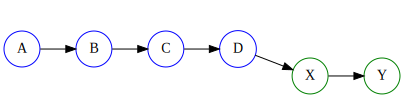

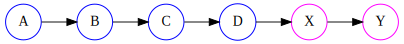

In [132]:
### Este código es para crear el gráfico de las ramas, no es necesario para el curso

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
fast_foward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
fast_foward.node('A', shape='circle', label='A', color='blue')
fast_foward.node('B', shape='circle', label='B', color='blue')
fast_foward.node('C', shape='circle', label='C', color='blue')
fast_foward.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
fast_foward.node('X', shape='circle', label='X', color='magenta')
fast_foward.node('Y', shape='circle', label='Y', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
fast_foward.edges(['AB', 'BC', 'CD', 'DX', 'XY'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(fast_foward)

Let's first check that we are on the main branch

In [133]:
!cd notebook_git && git branch --show-current

main


We create a new branch

In [134]:
!cd notebook_git && git branch branch_fast_forward

We switch to her

In [135]:
!cd notebook_git && git switch branch_fast_forward

Cambiado a rama 'branch_fast_forward'


In [136]:
!cd notebook_git && git branch --show-current

branch_fast_forward


Let's check the log

In [137]:
!cd notebook_git && git log --graph --oneline --decorate --all

* 564ccfb (HEAD -> branch_fast_forward, new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Okay, we are on a branch created from the main one with its entire log history, and we make two new commits.

In [138]:
!cd notebook_git && git rm archivo4.py && git commit -am "Eliminado archivo4.py"

rm 'archivo4.py'
[branch_fast_forward 4484e70] Eliminado archivo4.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo4.py


In [139]:
!cd notebook_git && git rm hola.py && git commit -am "Eliminado hola.py"

rm 'hola.py'
[branch_fast_forward 94149fc] Eliminado hola.py
 1 file changed, 3 deletions(-)
 delete mode 100644 hola.py


We make a new log to see what has been created in this new branch

In [140]:
!cd notebook_git && git log --graph --oneline --decorate

* 94149fc (HEAD -> branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As we can see, the last two commits are the ones we have created and we can check that these commits are not in the main branch (for this I specify that it should be done on the `main` branch)

In [141]:
!cd notebook_git && git log main --graph --oneline --decorate

* 564ccfb (new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Now we are going to the `main` branch to make the merge

In [142]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Finally, we do a fast-forward merge

In [143]:
!cd notebook_git && git merge --ff-only branch_fast_forward

Actualizando 564ccfb..94149fc
Fast-forward
 archivo4.py | 1 -
 hola.py     | 3 ---
 2 files changed, 4 deletions(-)
 delete mode 100644 archivo4.py
 delete mode 100644 hola.py


The merge has been done, let's see what happened with the log in the `main` branch

In [144]:
!cd notebook_git && git log --graph --oneline --decorate

* 94149fc (HEAD -> main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As you can see, the two commits made in the `branch_fast_forward` branch have been kept.

#### No fast-forward or true merge

In this case, we create a new branch, leaving the main one untouched, and modify the new one, performing several commits. Then, we make a commit on the main branch. Therefore, when merging the new branch into the main, only a single commit will be visible from the new branch. To perform this type of merge, we write `git merge <branch> --no-ff`

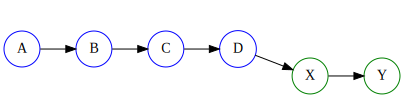

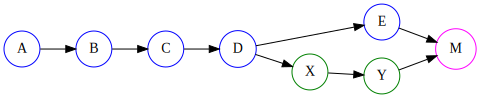

In [145]:
### Este código es para crear el gráfico de las ramas, no es necesario para el curso

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
not_fast_forward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
not_fast_forward.node('A', shape='circle', label='A', color='blue')
not_fast_forward.node('B', shape='circle', label='B', color='blue')
not_fast_forward.node('C', shape='circle', label='C', color='blue')
not_fast_forward.node('D', shape='circle', label='D', color='blue')
not_fast_forward.node('E', shape='circle', label='E', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
not_fast_forward.node('X', shape='circle', label='X', color='green')
not_fast_forward.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
not_fast_forward.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
not_fast_forward.edges(['AB', 'BC', 'CD', 'DE'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])
not_fast_forward.edges(['DX', 'XY', 'YM'])

# Agregar flechas de la rama principal al nodo M
not_fast_forward.edge('E', 'M')

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(not_fast_forward)

Let's first check that we are on the main branch

In [146]:
!cd notebook_git && git branch --show-current

main


We create a new branch

In [147]:
!cd notebook_git && git branch branch_no_fast_forward

We switch to her

In [148]:
!cd notebook_git && git switch branch_no_fast_forward

Cambiado a rama 'branch_no_fast_forward'


In [149]:
!cd notebook_git && git branch --show-current

branch_no_fast_forward


Okay, we are on a branch created from the main one with its entire log history, and we make two new commits.

In [150]:
!cd notebook_git && touch file1 && git add file1 && git commit -m "file1"

[branch_no_fast_forward e4e23c9] file1
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file1


In [151]:
!cd notebook_git && touch file2 && git add file2 && git commit -m "file2"

[branch_no_fast_forward 8df3429] file2
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file2


We make a new log to see what has been created in this new branch

In [152]:
!cd notebook_git && git log --graph --oneline --decorate

* 8df3429 (HEAD -> branch_no_fast_forward) file2
* e4e23c9 file1
* 94149fc (main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As we can see, the last two commits are the ones we have created and we can check that these commits are not in the main branch (for this I specify that it should be done on the `main` branch)

In [153]:
!cd notebook_git && git log main --graph --oneline --decorate

* 94149fc (main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Now we are going to the `main` branch

In [154]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


We create a new commit

In [155]:
!cd notebook_git && touch file3 && git add file3 && git commit -m "file3"

[main 8bdf4d8] file3
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file3


Finally, we do a non-fast-forward merge

In [152]:
!cd notebook_git && git merge branch_no_fast_forward --no-ff

ommit. comenzando con '#' serán ignoradas, y un mensaje vacío abortasaria esta># especialmente si esto fusiona un upstream actualizado en una rama de tópico. /home/wallabot/Documentos/web/portafolio/posts/notebook_git/.git/MERGE_MSG   [ línea 1/7 (14%), col 1/48 (2%), car 0/301 (0%) ]             [ Párrafo justificado ]...llabot/Documentos/web/portafolio/posts/notebook_git/.git/MERGE_MSG Modificado

As we can see, it opens the editor to enter a commit message and a default message. We accept the message and see what has happened.

In [156]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


In [157]:
!cd notebook_git && git log --graph --oneline --decorate

*   274529c (HEAD -> main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


In [158]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo8.py  file1  file2  file3


As we can see, a new commit has been created with the changes from the new branch in the main branch.

#### Squash

In this type of merge, all the commits from a new branch are combined into a single commit in the main branch. For this, we write `git merge <branch> --squash`

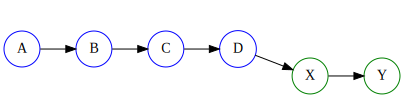

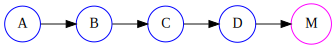

In [159]:
### Este código es para crear el gráfico de las ramas, no es necesario para el curso

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
squash = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
squash.node('A', shape='circle', label='A', color='blue')
squash.node('B', shape='circle', label='B', color='blue')
squash.node('C', shape='circle', label='C', color='blue')
squash.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
squash.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
squash.edges(['AB', 'BC', 'CD', 'DM'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(squash)

Let's first check that we are on the main branch

In [160]:
!cd notebook_git && git branch --show-current

main


We create a new branch

In [161]:
!cd notebook_git && git branch branch_squash

We switch to her

In [162]:
!cd notebook_git && git switch branch_squash

Cambiado a rama 'branch_squash'


In [163]:
!cd notebook_git && git branch --show-current

branch_squash


Let's check the log

In [164]:
!cd notebook_git && git log --graph --oneline --decorate --all

*   274529c (HEAD -> branch_squash, main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Okay, we are on a branch created from the main one with its entire log history, and we make three new commits.

In [165]:
!cd notebook_git && git rm file1 && git commit -am "Eliminado file1"

rm 'file1'
[branch_squash 767b632] Eliminado file1
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1


In [166]:
!cd notebook_git && git rm file2 && git commit -am "Eliminado file2"

rm 'file2'
[branch_squash a47f771] Eliminado file2
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file2


In [167]:
!cd notebook_git && git rm file3 && git commit -am "Eliminado file3"

rm 'file3'
[branch_squash 85f8c9f] Eliminado file3
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file3


We make a new log to see what has been created in this new branch

In [168]:
!cd notebook_git && git log --graph --oneline --decorate

* 85f8c9f (HEAD -> branch_squash) Eliminado file3
* a47f771 Eliminado file2
* 767b632 Eliminado file1
*   274529c (main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As we can see, the last three commits are the ones we have created and we can verify that these commits are not in the main branch (for this reason I specify that it should be done on the `main` branch)

In [169]:
!cd notebook_git && git log main --graph --oneline --decorate

*   274529c (main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Now we are going to the `main` branch to make the merge

In [170]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


We perform a squash merge

In [171]:
!cd notebook_git && git merge branch_squash --squash

Actualizando 274529c..85f8c9f
Fast-forward
Commit de aplastamiento -- no actualizando HEAD
 file1 | 0
 file2 | 0
 file3 | 0
 3 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1
 delete mode 100644 file2
 delete mode 100644 file3


The merge has been made, let's see what happened with the log in the `main` branch

In [172]:
!cd notebook_git && git log --graph --oneline --decorate

*   274529c (HEAD -> main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Changes made in the branch are not showing up, let's do a `git status`

In [173]:
!cd notebook_git && git status

En la rama main
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	borrados:        file1
	borrados:        file2
	borrados:        file3



We see that we have to make the commit with the merge. This is because git doesn't know what message to put and leaves it to us to do so, so we do it.

In [174]:
!cd notebook_git && git commit -m "Merge squash de los commits de la rama branch_squash"

[main 52acb97] Merge squash de los commits de la rama branch_squash
 3 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1
 delete mode 100644 file2
 delete mode 100644 file3


We run `git log` again

In [175]:
!cd notebook_git && git log --graph --oneline --decorate

* 52acb97 (HEAD -> main) Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Conflicts when merging

When branches are merged, it can happen that the same file has been modified in several branches. This is common in projects where multiple people are developing, so let's see how to solve it.

#### We create a conflict

We check that we are on the `main` branch

In [176]:
!cd notebook_git && git branch --show-current

main


We create a new branch from this one

In [177]:
!cd notebook_git && git branch rama_con_conflicto

We add a line to the file `archivo1.py`, remember that we are on the `main` branch.

In [178]:
!cd notebook_git && echo "print('rama main')" >> archivo1.py

In [179]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama main')


`archivo1.py` is modified, we make a commit

In [180]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py en rama main"

[main 53f909b] archivo1.py en rama main
 1 file changed, 1 insertion(+)


Now we are going to the branch `rama_con_conflicto` and add a new line to `archivo1.py`

In [181]:
!cd notebook_git && git switch rama_con_conflicto

Cambiado a rama 'rama_con_conflicto'


In [182]:
!cd notebook_git && git branch --show-current

rama_con_conflicto


In [183]:
!cd notebook_git && echo "print('rama rama_con_conflicto')" >> archivo1.py

In [184]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama rama_con_conflicto')


As we can see, `archivo1.py` is not the same in the `main` branch and in the `rama_con_conflicto` branch. We make a commit with the modification of `archivo1.py` in the `rama_con_conflicto` branch.

In [185]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py en rama rama_con_conflicto"

[rama_con_conflicto 32851c3] archivo1.py en rama rama_con_conflicto
 1 file changed, 1 insertion(+)


We go back to the `main` branch

In [186]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


In [187]:
!cd notebook_git && git branch --show-current

main


We do a merge of the branch `rama_con_conflicto`

In [188]:
!cd notebook_git && git merge rama_con_conflicto

Auto-fusionando archivo1.py
CONFLICTO (contenido): Conflicto de fusión en archivo1.py
Fusión automática falló; arregle los conflictos y luego realice un commit con el resultado.


When doing the merge, it already warns us that there is a conflict in `archivo1.py` and that the merge could not be completed. We run a `git status`

In [189]:
!cd notebook_git && git status

En la rama main
Tienes rutas no fusionadas.
  (arregla los conflictos y ejecuta "git commit"
  (usa "git merge --abort" para abortar la fusion)

Rutas no fusionadas:
  (usa "git add <archivo>..." para marcar una resolución)
	modificados por ambos:  archivo1.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


It tells us the same thing, but gives us more information, telling us that we can abort the merge with `git merge --abort`. But instead of that, we are going to solve it.

#### Resolve a conflict

In our case we know where the problem is, but if we don't know it, we can find the problem using `git diff`

In [190]:
!cd notebook_git && git diff archivo1.py

diff --cc archivo1.py
index 8b4bf58,b5c003c..0000000
--- a/archivo1.py
+++ b/archivo1.py
@@@ -1,2 -1,2 +1,6 @@@
  print('Este es el archivo 1')
++<<<<<<< HEAD
 +print('rama main')
++=======
+ print('rama rama_con_conflicto')
++>>>>>>> rama_con_conflicto


`git diff` is telling us that the problem is in the last line. The version of the file from the `HEAD` branch (which we are currently on, `main`) has `print('rama main')` on the last line, while the version from the `rama_con_conflicto` branch has `print('rama rama_con_conflicto')` on the last line. So, we need to open the file with any editor and resolve this.

After editing the file with my code editor, I have removed all the unnecessary lines and it looks like this:

In [192]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama main')

Now we do a `git status` to see what we have to do

In [193]:
!cd notebook_git && git status

En la rama main
Tienes rutas no fusionadas.
  (arregla los conflictos y ejecuta "git commit"
  (usa "git merge --abort" para abortar la fusion)

Rutas no fusionadas:
  (usa "git add <archivo>..." para marcar una resolución)
	modificados por ambos:  archivo1.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


It tells us that we have the file `archivo1.py` with modifications, so we add it to the `staged` area and then make a commit.

In [194]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py con el merge resuelto"

[main 679bb49] archivo1.py con el merge resuelto


We run `git status` again to see if it has been resolved.

In [195]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


It seems to be resolved, let's do a `git log` to check it.

In [196]:
!cd notebook_git && git log --graph --oneline --decorate

*   679bb49 (HEAD -> main) archivo1.py con el merge resuelto
|\  
| * 32851c3 (rama_con_conflicto) archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Delete branches

The idea of a branch is to open it to develop a new feature or functionality in such a way that it does not affect the rest of the development team. Therefore, once this is achieved, it is merged with the main branch. So after the merge, there is no point in keeping the branch, so it should be deleted, but this will be done differently depending on whether the branch has been merged with the main one or not.

#### Delete merged branches (`git branch -d <branch>`)

To delete a branch that has already been merged with the main branch, you just need to do `git branch -d <branch>` or `git branch --delete <branch>`. Let's delete the last branch we created and merged.

In [197]:
!cd notebook_git && git branch -d rama_con_conflicto

Eliminada la rama rama_con_conflicto (era 32851c3).


If we now list all the branches, we can see that we no longer have `rama_con_conflicto`

In [198]:
!cd notebook_git && git branch

  branch_fast_forward
  branch_no_fast_forward
  branch_squash
* main
  new_branch
  new_branch2


#### Delete branches that have not been merged with the main branch (`git branch -D <branch>`)

If we try to do the same thing with a branch that has never been merged with another, we will get an error

Let's create a new branch, we're going to make a commit and we won't merge it.

In [199]:
!cd notebook_git && git branch branch_sin_fusion

In [200]:
!cd notebook_git && git switch branch_sin_fusion

Cambiado a rama 'branch_sin_fusion'


In [201]:
!cd notebook_git && touch file4 && git add file4 && git commit -m "file4"

[branch_sin_fusion 9506b0a] file4
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file4


In [202]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


With everything we've learned so far, we can see that what we have done is create a new branch, switch to it, create a new file, make a commit, and return to the `main` branch. Now let's try to delete this new branch.

In [203]:
!cd notebook_git && git branch -d branch_sin_fusion

error: La rama 'branch_sin_fusion' no ha sido fusionada completamente.
Si estás seguro de querer borrarla, ejecuta 'git branch -D branch_sin_fusion'.


As we can see, it tells us that `branch_sin_fusion` has not been merged and therefore has not been deleted. If we are sure we want to delete it, we need to do `git branch -D branch_sin_fusion`, so we do this to delete it.

In [204]:
!cd notebook_git && git branch -D branch_sin_fusion

Eliminada la rama branch_sin_fusion (era 9506b0a).


Now it has been deleted

## Working with remote repositories

When we develop software, we usually don't do it alone; we typically work in a team. Therefore, it doesn't make sense to have a local Git repository, but rather to have a remote repository that everyone can work on and share progress.
> Note: The goal of this post is to explain Git. For the connection with remote repositories, I will explain it using GitHub because it is the most used Git repository hosting service, but I will not go into depth about GitHub.

### Clone a remote repository (`git clone <repository>`)

If we start working on a repository that has already been created, the first thing we need to do is clone it. For this, we need to run `git clone <repository>`, where `<repository>` can be a URL or an SSH address. Since large language models and ChatGPT are very popular right now, let's clone an open-source repository created by the community, [Open-Assistant](https://github.com/LAION-AI/Open-Assistant). To do this, we will run `git clone https://github.com/LAION-AI/Open-Assistant`

In [11]:
!git clone https://github.com/LAION-AI/Open-Assistant.git

Clonando en 'Open-Assistant'...
remote: Enumerating objects: 29769, done.
remote: Counting objects: 100% (673/673), done.
remote: Compressing objects: 100% (310/310), done.
remote: Total 29769 (delta 398), reused 577 (delta 354), pack-reused 29096
Recibiendo objetos: 100% (29769/29769), 33.61 MiB | 29.29 MiB/s, listo.
Resolviendo deltas: 100% (19967/19967), listo.


This creates the `Open-Assistant` folder with all the code from the repository, we can go inside and check out all the code.

In [13]:
!cd Open-Assistant && ls

ansible		 deploy		      model	      safety
assets		 discord-bots	      notebooks       scripts
backend		 docker		      oasst-data      setup.cfg
CODEOWNERS	 docker-compose.yaml  oasst-shared    text-frontend
CONTRIBUTING.md  docs		      pyproject.toml  website
copilot		 inference	      README.md
data		 LICENSE	      redis.conf


I delete the folder

In [ ]:
!rm -r Open-Assistant

### Linking a Local Repository to a Remote One

If the opposite happens, if we first start developing locally and then want to synchronize with a remote repository, we have to do the following
* First create an empty remote repository, in my case I created the repository `notebook_git` on GitHub which I will delete later* Get the repository URL or SSH address* Synchronize them using `git remote add origin <URL>`
The empty repository I created on GitHub looks like this
![notebook git repo](https://images.maximofn.com/notebook_git_repo.webp)
In my case, I will use the SSH address which is `git@github.com:maximofn/notebook_git.git`

In [205]:
!cd notebook_git && git remote add origin git@github.com:maximofn/notebook_git.git

They are already linked, but to make sure we can run `git remote -v`

In [206]:
!cd notebook_git && git remote -v

origin	git@github.com:maximofn/notebook_git.git (fetch)
origin	git@github.com:maximofn/notebook_git.git (push)


### Push changes from a local repository to a remote repository (`git push`)

As we said, they are linked, but if I go to my repository on GitHub it still looks like this
![notebook git repo](https://images.maximofn.com/notebook_git_repo.webp)
The local and remote repositories are linked, but now all changes from the local repository need to be sent to the remote repository. To do this, you would use `git push origin <local branch>:<remote branch>`, that is, since our main branch is called `main` and the main branch on GitHub is also called `main`, you would do `git push origin main:main`.If you remember, by default Git used to call the main branch `master`, but GitHub now calls the main branch `main` by default. So, if each person names their branches differently in their local repository, you need to specify which local branch writes to which remote branch.

You can configure the default connection between branches in git by running `git push --set-upstream origin main`. This sets up a relationship between the local branch `main` and the remote branch `main`. Once this relationship is established, you only need to run `git push` to upload changes made locally to the remote server.
So we establish the connection between branches

In [207]:
!cd notebook_git && git push --set-upstream origin main

Enumerando objetos: 51, listo.
Contando objetos: 100% (51/51), listo.
Compresión delta usando hasta 12 hilos
Comprimiendo objetos: 100% (38/38), listo.
Escribiendo objetos: 100% (51/51), 4.21 KiB | 2.11 MiB/s, listo.
Total 51 (delta 18), reusado 0 (delta 0)
remote: Resolving deltas: 100% (18/18), done.
To github.com:maximofn/notebook_git.git
 * [new branch]      main -> main
Rama 'main' configurada para hacer seguimiento a la rama remota 'main' de 'origin'.


Now we can just do `git push` to upload local changes to the remote repository

In [208]:
!cd notebook_git && git push

Everything up-to-date


If we now go back to our GitHub repository, it looks like this
![notebook git repo push](https://images.maximofn.com/notebook_git_repo_push.webp)

If we do a `ls` in our local repository, we can see that the files we have in the remote repository are also in the local repository, meaning we have synchronized the local and remote repositories.

In [209]:
!cd notebook_git && ls -a

.  ..  api_keys.py  archivo1.py  archivo2.py  archivo8.py  .git  .gitignore


The only ones not in the remote repository are `api_keys.py`, which we added to the `.gitignore` file, meaning we told git not to track it. And `.git`, which is where the configuration of our local repository is stored and should not be uploaded to the remote repository, because each person will have their own git configuration and therefore it should not be synchronized.

### Download changes from a remote repository to a local repository (`git pull`)

Now we are going to do the opposite, we are going to pull down any new changes that have been made in the remote repository. If we look at the state of the remote repository, we can see there is a button that says `Add a README`, so we click it to add it.
![notebook git repo push](https://images.maximofn.com/notebook_git_repo_push.webp)

When we click, an editor will open. We leave what GitHub has put and save the changes by clicking on the `Commit changes...` button.
![noteboot git repo readme](https://images.maximofn.com/notebook_git_repo_readme.webp)
A window will pop up asking for a commit message, we leave the default one and click on `Commit changes`
![notebook git repo commit message](https://images.maximofn.com/notebook_git_repo_commit_message.webp)
By doing that, the repository will end up like this
![notebook git repo pull](https://images.maximofn.com/notebook_git_repo_pull.webp)
A new file called `README.md` has been created, but if we run `ls` in the local repository we won't find it.

In [10]:
!cd notebook_git && ls | grep README

So, we need to bring the changes from the remote repository to the local one. For this, you have to do `git pull origin <remote branch>` to tell Git which remote branch you are going to fetch data from. However, just like before, you can establish a relationship between the remote branch and the local branch in the following way: `git branch --set-upstream-to=origin/<local branch> <remote branch>`. But since our local branch is called `main` and the remote GitHub branch is also called `main`, you would need to change the previous command to `git branch --set-upstream-to=origin/main main`.
Once this is done, to download the new changes from the remote repository to the local one, you would only need to do `git pull`

Let's establish the relationship between branches with `git branch --set-upstream-to=origin/main main`

In [210]:
!cd notebook_git && git branch --set-upstream-to=origin/main main

Rama 'main' configurada para hacer seguimiento a la rama remota 'main' de 'origin'.


Now we can bring the changes from the remote repository to the local repository with `git pull`

In [211]:
!cd notebook_git && git pull

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Desempaquetando objetos: 100% (3/3), 646 bytes | 646.00 KiB/s, listo.
Desde github.com:maximofn/notebook_git
   679bb49..527e07a  main       -> origin/main
Actualizando 679bb49..527e07a
Fast-forward
 README.md | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 README.md


As we can see, it says that `README.md` has been added, let's check by running `ls`

In [212]:
!cd notebook_git && ls | grep README

README.md


We have the file locally

### Synchronize remote and local branches

As we have seen, we had to synchronize the remote and local branches in order to upload and download data. However, if we first create the repository on GitHub and then clone it, such synchronization is no longer necessary.

## Alias

Every time we have wanted to make a log we have used this command `git log --graph --oneline --decorate`, however, remembering this command is quite complicated, in fact, I don't remember it, every time I have wanted to use it I had to look it up because I didn't remember it, so it would be great to have a way to abbreviate it.

For this, Git offers `aliases`, so you can create aliases for any commands you want. To do this, you need to run `git config --global alias.<name of the alias> "command"`

Therefore, we are going to call `git tree` the command `git log --graph --oneline --decorate`, since it allows us to see the history with branch forks and merges as if they were the growth of a tree, so we do `git config --global alias.tree "log --graph --oneline --decorate"`
> **Important**: Do not put the word `git` inside the command

In [218]:
!git config --global alias.tree "log --graph --oneline --decorate"

If we now go to our repository and run `git tree`, we will see the history as we used to before.

In [217]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, origin/main) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As we can see, our alias has been created.

### Aliases of existing git commands

You can create aliases for commands that already exist in git; in fact, this is a practice used by many people, especially to abbreviate. So we are going to create one. We will make an alias for the `git status` command and rename it as `git st` in the following way: `git config --global alias.st "status"`

In [219]:
!git config --global alias.st "status"

We test it now

In [220]:
!cd notebook_git && git st

En la rama main
Tu rama está actualizada con 'origin/main'.

nada para hacer commit, el árbol de trabajo está limpio


We already have the command `git status` simplified to `git st`

### Aliases for commands that are not git commands

We can create aliases for commands that are not git-related, for example, because we think git needs that new command. It's done the same way with the exception that the command must be preceded by `!`, that is, it would be `git config --global alias.<alias name> "!command"`

When we have seen the conflicts, we have seen that git tells us where they are, but to resolve them we have to edit the code ourselves, so we can create a git alias so that we can open a file with the text editor of our choice. In my case, I will create an alias that will open files with `vscode`. To do this, I need to run `git config --global alias.code "!code"`

In [222]:
!git config --global alias.code "!code"

We tested it

In [223]:
!cd notebook_git && git code README.md

After doing this, `README.md` opened in `vscode`

### List with all the aliases

If we forget the aliases we have created, we can view the global git configuration. However, since this can be a bit overwhelming due to the amount of information it provides, we can filter it to show only the aliases we have created. For this, we use `git config --get-regexp ^alias\.`

In [224]:
!git config --get-regexp ^alias\.

alias.tree log --graph --oneline --decorate
alias.st status
alias.code !code


We get the aliases we have created

But even better, we can create an alias to get the aliases, for this we do `git config --global alias.alias "config --get-regexp ^alias\."`

In [225]:
!git config --global alias.alias "config --get-regexp ^alias\."

If we now do `git alias`

In [226]:
!git alias

alias.tree log --graph --oneline --decorate
alias.st status
alias.code !code
alias.alias config --get-regexp ^alias\.


We get the list with all our aliases

## Stash store (`git stash`)

Suppose we are working on a branch, we have several modified files, we haven't made a commit, and for some reason we need to switch to another branch. For example, we are on a branch developing a new feature, and we have to leave it halfway because there is a critical bug in the main branch.
One solution would be to make a commit to save the changes and come back later. But maybe we left the code halfway and don't want to make a commit. So for that, stash was invented, which is like a storage place where you leave your code stored to be able to recover it later.
It is a stack, which means that the last thing to enter is the first to exit.

Let's see how to do it, first we create a new branch that we will call `new_feature`

In [2]:
!cd notebook_git && git branch new_feature

We switch to her

In [3]:
!cd notebook_git && git switch new_feature

Cambiado a rama 'new_feature'


We are going to modify `archivo2.py` and `archivo8.py`

In [4]:
!cd notebook_git && echo "print('new_feature')" >> archivo2.py && echo "print('new_feature')" >> archivo8.py

We run a `git status` to check that changes have been made

In [5]:
!cd notebook_git && git status

En la rama new_feature
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     archivo2.py
	modificados:     archivo8.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Let's add `archivo8.py` to the `staged` area

In [6]:
!cd notebook_git && git add archivo8.py

We run `git status` again

In [7]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	modificados:     archivo8.py

Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     archivo2.py



As we can see, we have two modified files, one of which is also in the `staged` area. If we now needed to switch branches, to avoid losing our changes, we could either commit them or store them in the `stash`, so let's do the latter using `git stash`.

In [8]:
!cd notebook_git && git stash

Directorio de trabajo y estado de índice WIP on new_feature: 527e07a Create README.md guardados


If we now run `git status` again, let's see what happens

In [9]:
!cd notebook_git && git status

En la rama new_feature
nada para hacer commit, el árbol de trabajo está limpio


Files with modifications no longer appear, it's as if we had made a commit.

> **Important**: New files that have never been tracked by Git will not be added to the repository, so for new files, you need to at least do a `git add` first.

If I now create a new file and try to take it to the repository, I will get an error.

In [16]:
!cd notebook_git && touch archivo9.py

In [11]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [13]:
!cd notebook_git && git stash

No hay cambios locales para guardar


In [14]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


As we can see, `archivo9.py` has not been saved in the repository, so it should have been added with `git add`.

In [15]:
!cd notebook_git && rm archivo9.py

### Everything to the stash (`git stash -u -a`)

As we have seen, only the files that git is tracking are sent to the repository. However, if we have newly created files or ignored files, they will not be sent. To solve this, we can use the `-u` or `--include-untracked` flags to send new files that git has not yet tracked, and the `-a` or `--all` flag to include everything, even ignored files.

### List of stashes (`git stash list`)

As we have mentioned, the stash acts as a stack, so if we use this stash many times, in reality we will have a list of stashes, and to see the ones we have stored we can use `git stash list`

In [17]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


As we can see, we only have one, which indicates the branch (`on new_feature`), the last commit (`Create README.md`), and an identifier (`527e07a`).

### Stash with description (`git stash push -m <description>`)

As we have seen, the list returns the branch and the last commit, but this information only helps us know where we started modifying before saving to the history. Additionally, it returns an identifier that doesn't tell us much, so we can add a first description to the stash with `git stash push -m <description>`

First we do a `git status` to see what we have uncommitted.

In [18]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


We have `archivo9.py`, but let's remember that it has never been tracked by git, so to include it in a stash we need to use the `-u` flag or the `-a` flag, so we create a new stash with a description using the command `git stash push -u -m <description>`

In [28]:
!cd notebook_git && git stash push -u -m "archivo9.py"

Directorio de trabajo y estado de índice On new_feature: archivo9.py guardados


We pull out the list from the stash

In [29]:
!cd notebook_git && git stash list

stash@{0}: On new_feature: archivo9.py
stash@{1}: WIP on new_feature: 527e07a Create README.md


The new one appears much more clearly

### Recover the last stash (`git stash pop`)

As we have said, the stash is a stack of stores, so when it comes to recovering them, we will do it just like a stack, always recovering the last one.
![git stash push pop](https://images.maximofn.com/git-stash-push-pop.webp)
To recover the last stash we have to do `git stash pop`

First we do a `git status` to check that we don't have any pending changes

In [30]:
!cd notebook_git && git status

En la rama new_feature
nada para hacer commit, el árbol de trabajo está limpio


Now we recover the last stash

In [31]:
!cd notebook_git && git stash pop

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py

Descartado refs/stash@{0} (0246b0e922f654e7fc68cfeaf26e24fc511feb37)


If we run `git status` again, we will see that we have `archivo9.py` pending to be committed.

In [32]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py



And if we check the stash list, we will see that we only have one left.

In [33]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


### Remove a stash (`git stash drop <position>`)

If we want to delete a stash, we have to do `git stash drop <position>`, where `<position>` is the position that the stash occupies in the list.

We get the list of stashes

In [34]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


In our case, we only have one and it is at position 0 (`stash@{0}`), so to remove it, we would have to do `git stash drop 0`, but I'm not going to do it because I will delete it now with another command.

### Clear all stashes (`git stash clear`)

If we want to empty the entire stash list, we have to do `git stash clear`

In [35]:
!cd notebook_git && git stash clear

If we now request the list of stashes

In [36]:
!cd notebook_git && git stash list

We don't get anything because we have removed everything

Let's leave everything as it was, we do a `git status` to remember the changes we had pending

In [37]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py



We see that we are on the `new_feature` branch and that we have `archivo9.py` pending to be committed. Since we created it for the example, we delete it and return to the main branch.

In [39]:
!cd notebook_git && git reset archivo9.py

In [41]:
!cd notebook_git && rm archivo9.py

In [42]:
!cd notebook_git && git switch main

Cambiado a rama 'main'
Tu rama está actualizada con 'origin/main'.


## Tags

When we are developing code, there come times when we generate versions, for example `v1.1`, `v1.2`, etc. To have this better controlled, Git provides us with tags.

### Create a new tag (`git tag -a <tag_name> -m "<message>"`)

To create a tag we have to do `git tag -a <tag_name> -m "<message>"`

For example, let's create a tag on the current version of the repository. To do this, I will run `git tag -a v_tag -m "Tag with the repository at the end, where we explain the tags"`

In [1]:
!cd notebook_git && git tag -a v_tag -m "Tag con el repositorio en la parte final, en la que explicamos los tags"

### List of tags (`git tag`)

To see the tags we have created, we can run `git tag`

In [2]:
!cd notebook_git && git tag

v_tag


### Create a tag from an old commit (`git tag -a <tag_name> -m "<message>" <hash>`)

Let's do a `git tree` to see the history

In [3]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Although it's not mentioned in the description, when we made the commit `4bb9d75` that was when we finished the local version control part, so it would also be good to have a tag for that moment. To do this, we need to create a tag by adding the hash of that moment.

In [4]:
!cd notebook_git && git tag -a v_local -m "Tag con el repositorio en la parte de control de versiones de manera local" 4bb9d75

If we now make a list of the tags, the new one appears

In [5]:
!cd notebook_git && git tag

v_local
v_tag


And if we look at the commit history

In [8]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


At the point in history where we created the tag, the tag now appears `* 4bb9d75 (tag: v_local, new_branch) Commit with file 7`

### Switching between tags (`git reset --hard <tag>` or `git reset --soft <tag>`)

Just like we can move between different commits in the history, we can also move between tags. This has the advantage that we can move to another point in history without having to know the hash; by knowing the name of the tag we placed at that moment, we can simply do `git reset --hard <tag>` or `git reset --soft <tag>`.

First, let's do an `ls` to see the files we have

In [6]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo8.py  README.md


We also do a `git tree` to see where we are in the history.

In [7]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Now let's move to the point where we created the `v_local` tag using `git reset --hard v_local`

In [10]:
!cd notebook_git && git reset --hard v_local

HEAD está ahora en 4bb9d75 Commit con el archivo 7


If we now run `ls` again, we see that we don't have the same files.

In [11]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


If we also look at the history, we can see that we have changed the moment in history.

In [12]:
!cd notebook_git && git tree

* 4bb9d75 (HEAD -> main, tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


To go back to the last moment in history, since we have also created a tag, it will be enough to do `git reset --hard v_tag`

In [13]:
!cd notebook_git && git reset --hard v_tag

HEAD está ahora en 527e07a Create README.md


We go back to the history to check that we have returned to the last moment of the history

In [14]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py
